# MATH 4340 / COSC 4340: Numerical Methods for Differential Equations
# Notebook 5: Backward Euler Method

### Professor: Dane Taylor
### Date: Spring 2024


In [4]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1. Root finding

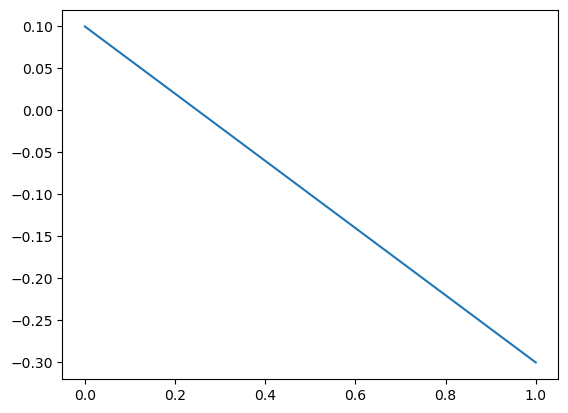

In [5]:
def g(x): return .1 - .4*x
x_vals = linspace(0,1,100)
plot(x_vals,g(x_vals))

In [6]:
from scipy.optimize import fixed_point as fp

point_1 = fp(g,0.5,xtol=1e-14)
print(point_1)
print(g(point_1))

0.07142857142857144
0.07142857142857142


#### Fixed point iteration just iterates $x(t+1) = g(x(t))$

In [7]:
x = 0.5
for i in range(15):
    print(x)
    x=g(x)

0.5
-0.1
0.14
0.044
0.0824
0.06704
0.073184
0.07072640000000001
0.07170944
0.07131622400000001
0.0714735104
0.07141059584000001
0.07143576166400001
0.0714256953344
0.07142972186624


#### Any fixed point of $x - g(x)$ is a root of $g(x)$ since $x=x - g(x)$ implies $g(x)=0$

In [8]:
def g2(x): return x - g(x)

point_2 = fp(g2,0.5,xtol=1e-14)
#point_2 = fp(g2,0.5,xtol=1e-2)
print(point_2)
print(g2(point_2))

0.2500000000000001
0.25000000000000017


In [9]:
print(g(point_2))

-4.163336342344337e-17


#### Fixed point iteration converges iff $ |\frac{dg}{dx}|<1$ near the fixed point. The iterations blow up if  $ |\frac{dg}{dx}|>1$ near the fixed point.

In [10]:
def g(x): return 1 - 2*x
x = 0.5
for i in range(15):
    print(x)
    x=g(x)

0.5
0.0
1.0
-1.0
3.0
-5.0
11.0
-21.0
43.0
-85.0
171.0
-341.0
683.0
-1365.0
2731.0


## 2. Backward Euler 

Requires a root-finding algorithm to solve the implicit equation

In [11]:
def backward_Euler(tn,f,y0):    
    N = len(tn)-1 # number of time steps
    h = tn[1]-tn[0] # step size
    
    yn = zeros(len(tn)) # allocate memory for yi values
    yn[0] = y0 # initial condition
    
    for i in range(N):        
        g = lambda y_temp: yn[i] + h*f(tn[i+1],y_temp)
        yn[i+1] = fp(g,yn[i],xtol=1e-15)
    return yn

In [12]:
def forward_Euler(ti,f,y0): 
    
    h = ti[1]-ti[0]
    N = len(ti)-1
    yi = zeros(len(ti))
    yi[0] = y0
    for i in range(N):
        yi[i+1] = yi[i] + h*f(ti[i],yi[i])
    return yi

def RK4(ti,f,y0): 
    h = ti[1]-ti[0]
    N = len(ti)
    y = zeros(N)
    y[0] = y0 
    
    for i in range(N-1):
        k1 = f(ti[i],y[i])
        k2 = f(ti[i]+h/2, y[i] + k1*h/2) 
        k3 = f(ti[i]+h/2, y[i] + k2*h/2) 
        k4 = f(ti[i]+h, y[i] + k3*h)
        
        y[i+1] = y[i] + h * (k1 + 2*k2 + 2*k3 + k4) /6
  
    return y 

In [13]:
def f(t,y): return 2*y
def true_soln(t): return exp(2*t)

y0,t0,T,N = 1,0,1,5
ti = linspace(t0,T,N+1)
yi = forward_Euler(ti,f,y0)
yi_back = backward_Euler(ti,f,y0)
yi_back

array([ 1.        ,  1.66666667,  2.77777778,  4.62962963,  7.71604938,
       12.8600823 ])

In [14]:
h = .2
for i in range(N+1):
    print(1/(1-2*h)**i*y0 )

1.0
1.6666666666666667
2.7777777777777777
4.629629629629631
7.71604938271605
12.860082304526752


In [15]:
def make_FE_fig2(ti,yi,yi2,true_soln):
    
    fig, ax = plt.subplots(1,2,figsize=(14,4))
    
    ax[0].scatter(ti,yi,40);
    ax[0].scatter(ti,yi2,40);    
    ax[0].plot(ti,true_soln(ti),'k');  
    
    ax[0].set_xlabel('time, $t$');
    ax[0].set_ylabel('$y(t)$');
    ax[0].legend(['y(t)','FE','BE']);
    ax[0].set_title('Approximate Solutions');
    
    ax[1].scatter(ti,abs(true_soln(ti)-yi),40);
    ax[1].scatter(ti,abs(true_soln(ti)-yi2),40);
    ax[1].set_title('Errors');
    ax[1].set_xlabel('time, $t$');
    ax[1].set_ylabel('$E_i = |y(t_i)-y_i|$');
    ax[1].legend(['FE','BE']);

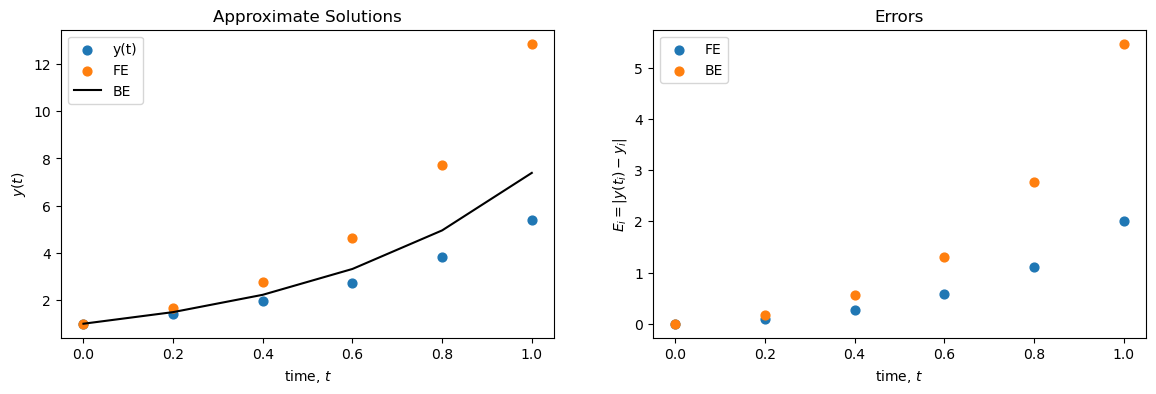

In [16]:
make_FE_fig2(ti,yi,yi_back,true_soln)

#### Study a different function. This time FE has larger error than BE

In [17]:
def f(t,y): return -2*y
def true_soln(t): return exp(-2*t)

yi = forward_Euler(ti,f,y0)
yi_back = backward_Euler(ti,f,y0)
yi_RK = RK4(ti,f,y0)

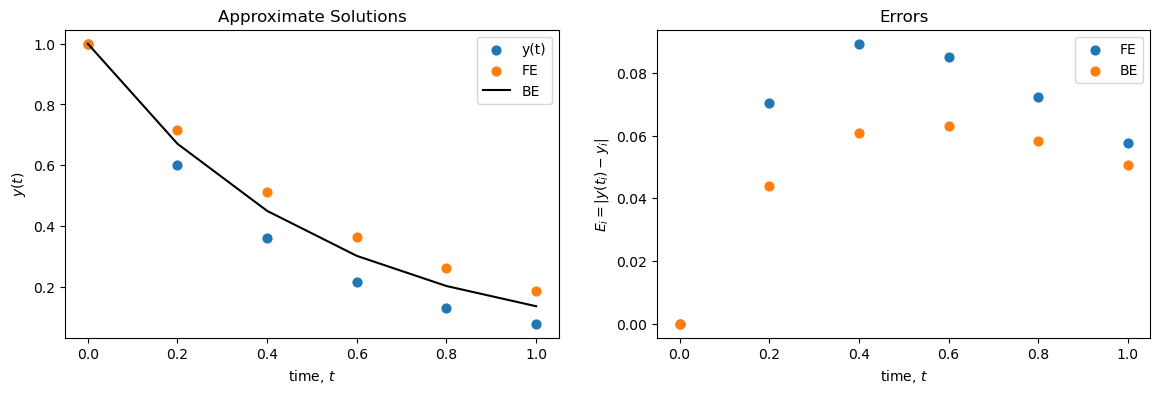

In [108]:
make_FE_fig2(ti,yi,yi_back,true_soln)

In [109]:
#local truncation error with N=40 points
local_errors_N5 = [abs(true_soln(ti)-yi)[1],abs(true_soln(ti)-yi_back)[1],abs(true_soln(ti)-yi_RK)[1]]
local_errors_N5

[0.07032004603563935, 0.04396566825007486, 7.995396436066837e-05]

## 3. Estimate the convergence rates by considering two choices for $N$ and studying how the error decreases as $N$ increases

In [110]:
N = 50
ti2 = linspace(t0,T,N)
yi2 = forward_Euler(ti2,f,y0)
yi_back2 = backward_Euler(ti2,f,y0)
yi_RK2 = RK4(ti2,f,y0)

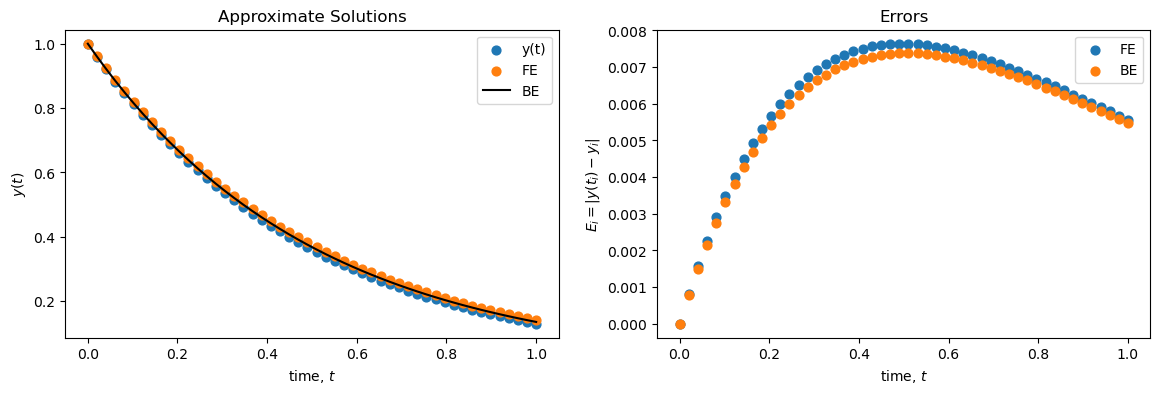

In [111]:
make_FE_fig2(ti2,yi2,yi_back2,true_soln)

In [112]:
#local truncation error with N=20 points
local_errors_N50 = [abs(true_soln(ti2)-yi2)[1],abs(true_soln(ti2)-yi_back2)[1],abs(true_soln(ti2)-yi_RK2)[1]]
local_errors_N50

[0.0008217678160900022, 0.0007788724400125124, 9.376507348335394e-10]

In [113]:
local_errors_N5

[0.07032004603563935, 0.04396566825007486, 7.995396436066837e-05]

In [114]:
array(local_errors_N50)/array(local_errors_N5)

array([1.16861103e-02, 1.77154692e-02, 1.17273827e-05])

#### $N$ increased by a factor of 10, so $h=(T-t_0)/N$ decreased by a factor of 10
#### In response the local error decreased by a factor of $10^2=100$ for the forward and backward euler methods

#### The local error decreased by a factor of $10^5=100,000$ for the 4th order RK method